Importing and Defining Image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('stupa.png', 0)
img2 = cv2.imread('No_stupa.png', 0)

Logical Operation Between image

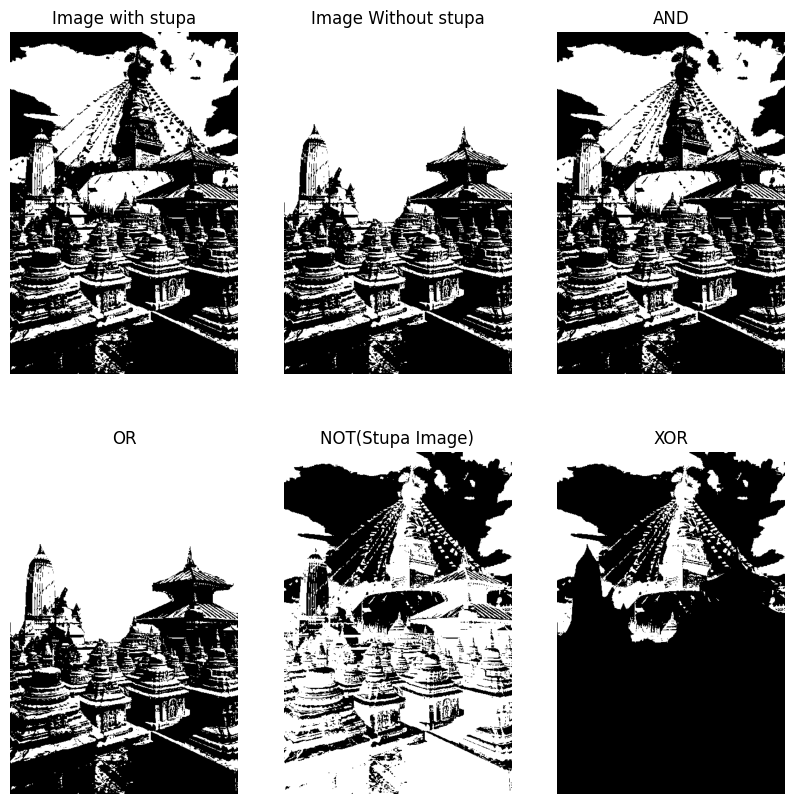

In [2]:
_, img1, = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)
_, img2, = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY)

AND = cv2.bitwise_and(img1, img2)
OR = cv2.bitwise_or(img1, img2)
NOT = cv2.bitwise_not(img1)
XOR = cv2.bitwise_xor(img1, img2)

titles = ['Image with stupa', 'Image Without stupa', 'AND', 'OR', 'NOT(Stupa Image)',
           'XOR']
images = [img1, img2, AND, OR, NOT, XOR]

plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray'), plt.title(titles[i])
    plt.axis('off')
plt.show()

Some Morphological operations like erosion, dilation, opening and Closing

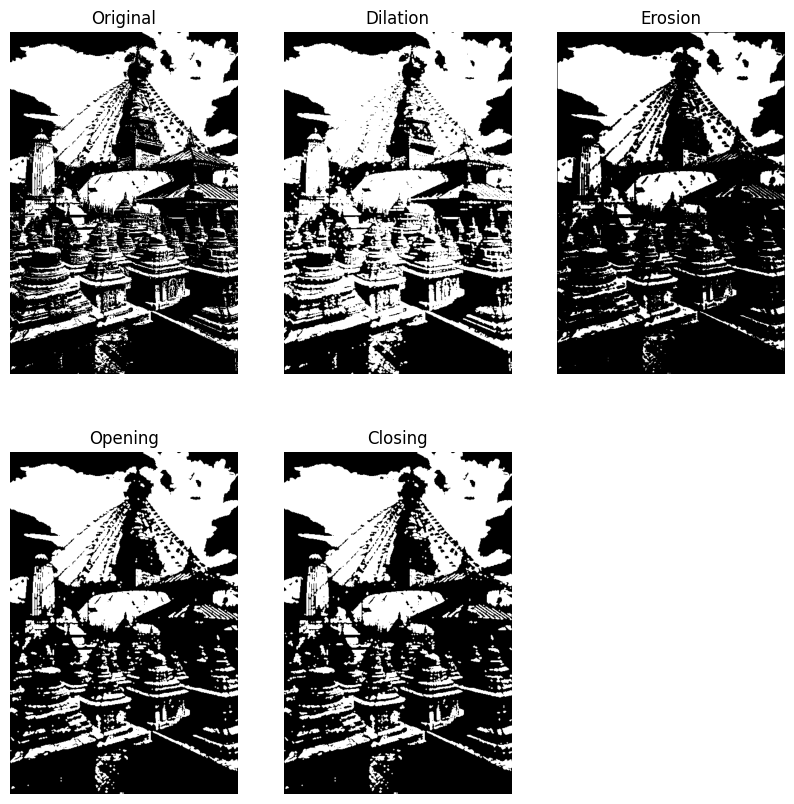

In [3]:
def pad_image(img, kernel):
    pad_h = kernel.shape[0] // 2
    pad_w = kernel.shape[1] // 2
    return np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', 
                  constant_values = 0)

def dilation(img, kernel):
    padded = pad_image(img, kernel)
    output = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            output[i, j] = np.max(region * kernel)
    return output

def erosion(img, kernel):
    padded = pad_image(img, kernel)
    output = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            output[i, j] = np.min(region[kernel==1])
    return output

def opening(img, kernel):
    return dilation(erosion(img, kernel), kernel)

def closing(img, kernel):
    return erosion(dilation(img, kernel), kernel)

_, binary = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)

binary = binary // 255
kernel = np.array([[0, 1, 0],
          [1, 1, 1],
          [0, 1, 0]])

dil = dilation(binary, kernel)
ero = erosion(binary, kernel)
opn = opening(binary, kernel)
cls = opening(binary, kernel)

titles = ['Original', 'Dilation', 'Erosion', 'Opening', 'Closing']
imgs = [binary, dil, ero, opn, cls]

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(2, 3, i+1), plt.imshow(imgs[i], 'gray'), plt.title(titles[i])
    plt.axis('off')
plt.show()

Point and Line Detection using some filters

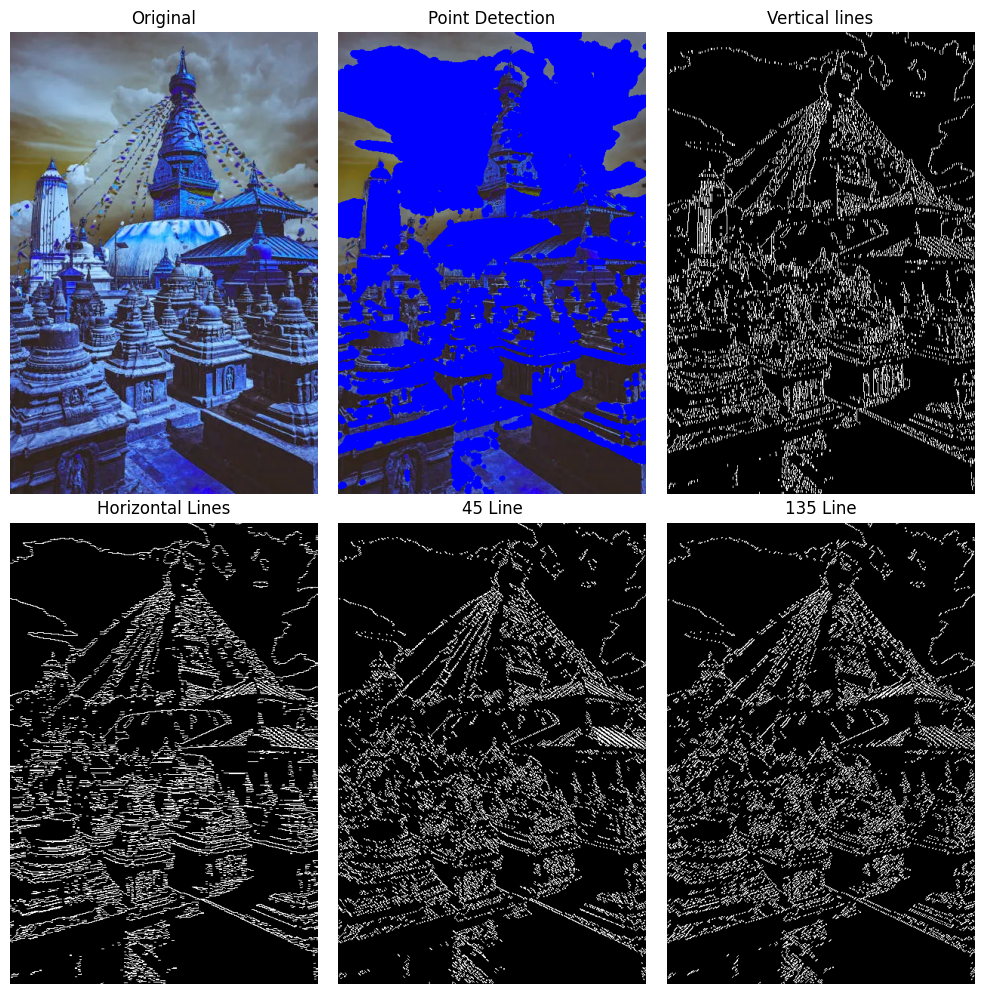

In [4]:
#Point Detection
threshold = 1900
laplacian_kernel = np.array([[0, 1, 0],
                             [1, 8, 1],
                             [0, 1, 0]])
gray_blur = cv2.GaussianBlur(img1, (3,3), 0) #smoothing
response = np.abs(cv2.filter2D(gray_blur, cv2.CV_64F, laplacian_kernel))
points = np.where(response >= threshold)
img = cv2.imread('stupa.png', cv2.COLOR_BGR2RGB)
img_points = img.copy()

for y, x in zip(points[0], points[1]):
    cv2.circle(img_points, (x, y), 3, (0, 0, 255), -1)

#Line detection
kernel_h = np.array([[-1, -1, -1],
                     [2, 2, 2],
                     [-1, -1, -1]])
kernel_v = np.array([[-1, 2, -1],
                     [-1, 2, -1],
                     [-1, 2, -1]])
kernel_45 = np.array([[2, -1, -1],
                     [-1, 2, -1],
                     [-1, -1, 2]])
kernel_135 = np.array([[-1, -1, 2],
                     [-1, 2, -1],
                     [2, -1, -1]])

vert_line = cv2.filter2D(img1, -1, kernel_v)
hori_line = cv2.filter2D(img1, -1, kernel_h)
diag_line = cv2.filter2D(img1, -1, kernel_45)
ndiag_line = cv2.filter2D(img1, -1, kernel_135)

titles = ["Original", "Point Detection", "Vertical lines", "Horizontal Lines",
           "45 Line", "135 Line"]
imgs = [img, img_points, vert_line, hori_line, diag_line, ndiag_line]
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(imgs[i], cmap='gray')
    plt.title(titles[i]), plt.axis('off')
plt.tight_layout()
plt.show()

Edge Detection using prewitt and Sobel filter

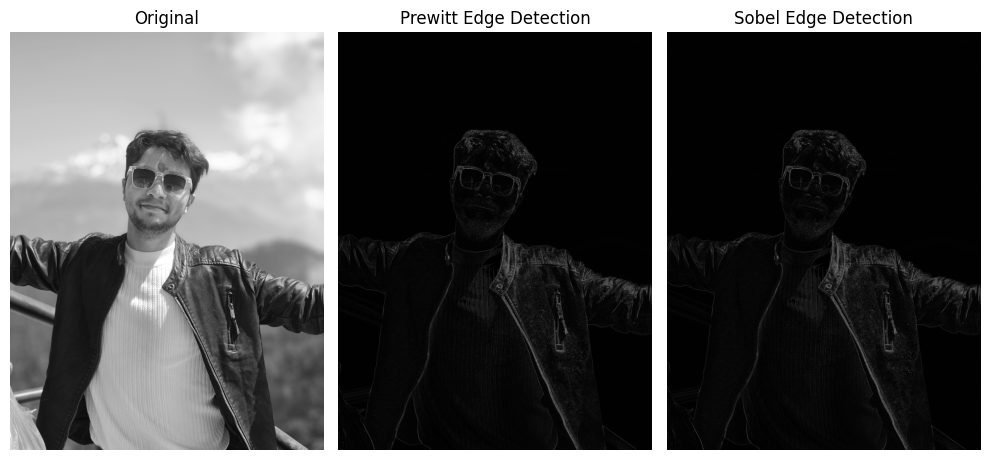

In [6]:
#Edge Detection
img = cv2.imread('photo.jpg', 0)

sobel_x = np.array([[-1, 0 , 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
sobel_y = np.array([[-1, -2 , -1],
                    [0, 0, 0],
                    [1, 2, 1]])

prewitt_x = np.array([[-1, 0 , 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])
prewitt_y = np.array([[-1, -1 , -1],
                    [0, 0, 0],
                    [1, 1, 1]])

def apply_filter(img, kernel_x, kernel_y):
    x = cv2.filter2D(img, cv2.CV_64F, kernel_x)
    y = cv2.filter2D(img, cv2.CV_64F, kernel_y)
    return cv2.magnitude(x, y)

prewitt = apply_filter(img, prewitt_x, prewitt_y)
sobel = apply_filter(img, sobel_x, sobel_y)

titles = ["Original", "Prewitt Edge Detection", "Sobel Edge Detection"]
imgs = [img, prewitt, sobel]

plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(1, 3, i+1), plt.imshow(imgs[i], cmap='gray')
    plt.title(titles[i]), plt.axis('off')

plt.tight_layout()
plt.show()

Hough Tranform For Lines

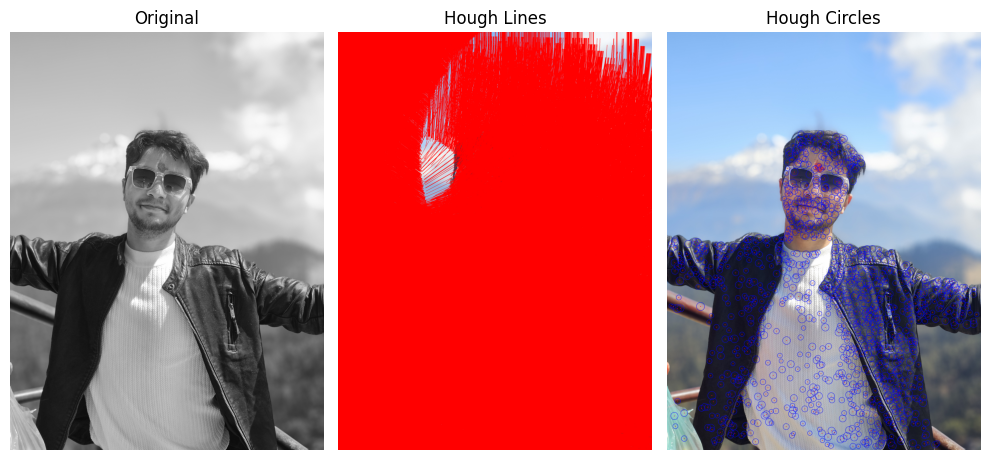

In [7]:
#Hough tranform for lines
org_img = cv2.imread('photo.jpg', cv2.COLOR_BGR2RGB)
edges = cv2.Canny(org_img, 50, 150)
lines_img = org_img.copy()
lines = cv2.HoughLines(edges, 1, np.pi/180, 100)
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000*(-b))        
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(-b))
        cv2.line(lines_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

circle_img = org_img.copy()
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, dp = 1, minDist = 20, param1 = 20,
                            param2 = 30, minRadius = 20, maxRadius=40)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for c in circles[0 , :]:
        cv2.circle(circle_img , (c[0], c[1] ) , c[2] , (255 , 0 , 0), 2) #outer cir
        cv2.circle(circle_img , (c[0], c[1] ), 2 , (0 , 0 , 255), 3)# center circle

titles = ['Original' , 'Hough Lines' , 'Hough Circles']
images = [img , lines_img , circle_img]
plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(1 , 3, i+1)
    plt.imshow(cv2.cvtColor(images[i] , cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

Thresholding

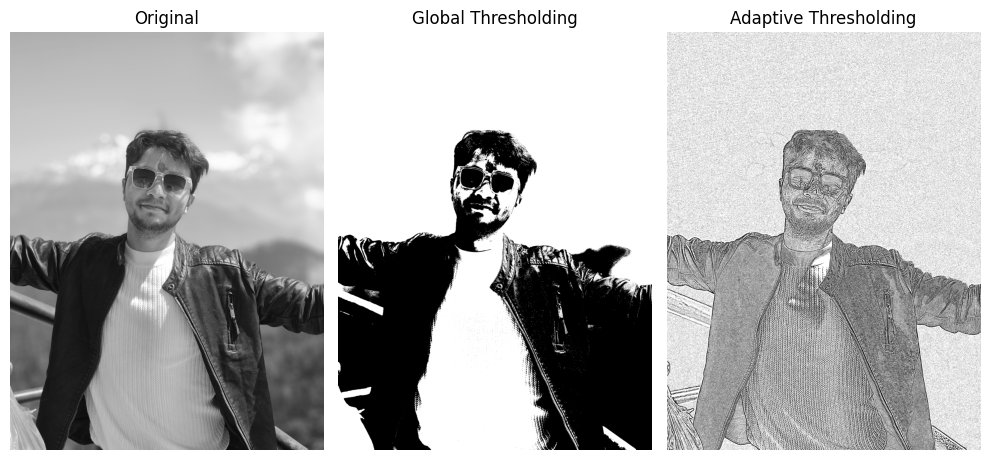

In [8]:
#Thresholding
_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
adaptive = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, 11, 2)

titles = ['Original', 'Global Thresholding', 'Adaptive Thresholding']
imgs = [img, thresh, adaptive]

plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(1 , 3 , i+1), plt.imshow(imgs[i], cmap= 'gray')
    plt.title(titles[i]), plt.axis('off')
plt.tight_layout()
plt.show()

Region Operations such as growing, splitting, and merging

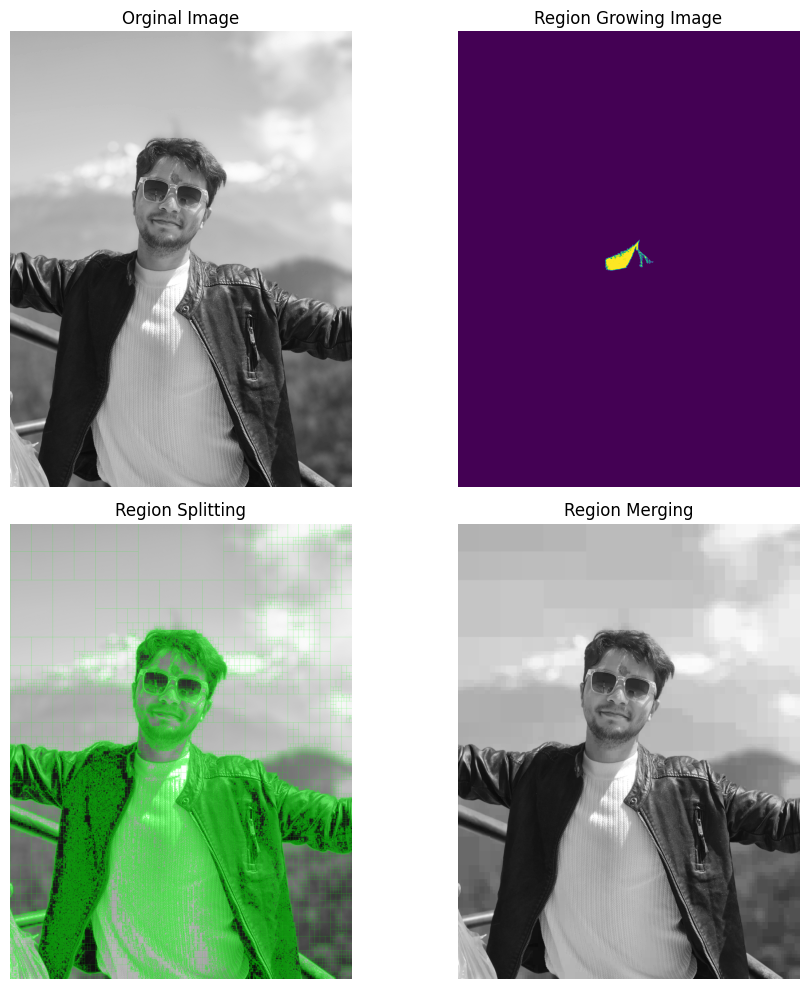

In [10]:
#Region Growing
def region_growing(img, seed, threshold=10):
    h, w = img.shape
    segmented = np.zeros((h, w), np.uint8)
    to_process = [seed]
    segmented[seed] = 255
    seed_value = img[seed]

    while to_process:
        x, y = to_process.pop(0)
        for dx in [-1, 0, 1]:
             for dy in [-1, 0, 1]:
                 xn, yn = x + dx, y + dy
                 if (0 <= xn < h) and (0 <= yn < w) and segmented[xn, yn] == 0:
                     if abs(int(img[xn, yn]) - int(seed_value)) < threshold:
                         segmented[xn, yn] = 255
                         to_process.append((xn, yn))
    return segmented

#Region splitting
def is_homogenous(region, threshold):
    return np.var(region) < threshold

def quadtree_split(img, x, y, w, h, threshold, segments=None):
    if segments is None:
        segments = []
    region = img[y:y + h, x:x + w]
    
    if w <= 4 or h <= 4 or is_homogenous(region, threshold):
        mean_val = np.mean(region)
        segments.append(((x, y, w, h), mean_val))
    else:
        hw, hh = w // 2, h // 2
        quadtree_split(img, x, y, hw, hh, threshold, segments)
        quadtree_split(img, x + hw, y, w - hw, hh, threshold, segments)
        quadtree_split(img, x, y + hh, hw, h - hh, threshold, segments)
        quadtree_split(img, x + hw, y + hh, w - hw, h - hh, threshold, segments)
    
    return segments

def draw_boundaries(img, regions):
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for (x, y, w, h), _ in regions:
        cv2.rectangle(img_color, (x, y), (x + w, y + h), (0, 255, 0), 1)
    return img_color

def merge_segments(img, regions):
    merged = np.zeros_like(img, dtype=np.uint8)
    for (x, y, w, h), mean_val in regions:
        merged[y:y + h, x:x + w] = int(mean_val)
    return merged

img = cv2.imread('photo.jpg', 0)
seed_point = (int(img.shape[0]//2), int(img.shape[1]//2))
region_grow = region_growing(img, seed_point, threshold=20)
regions = quadtree_split(img, 0, 0, img.shape[1], img.shape[0], threshold= 20)
boundary_img = draw_boundaries(img, regions)
merged_img = merge_segments(img, regions)

titles = ['Orginal Image', 'Region Growing Image', 'Region Splitting',
           'Region Merging']
imgs = [img, region_grow, boundary_img, merged_img]

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(imgs[i], cmap='gray' if i != 1 else None)
    plt.title(titles[i]), plt.axis('off')
plt.tight_layout()
plt.show()